In [1]:
# https://www.kaggle.com/code/dimitriosthomaidis/xgboost-feature-engineering/notebook
# https://www.kaggle.com/code/subhranilmondal12/data-visualization-mlmodel-withcross-validation/notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

DF = pd.read_csv('../credit_customers.csv')

### Dataset Description

- checking_status; status of existing checking account
- duration; duration in months
- credit_history; credits take, paid back duly, delays, critical accounts
- purpose; purpose of the credit
- credit_amount; amount of credit
- savings_status; status of savings accounts/bond
- employment; present employement, in number of years
- installment_commitment; installment rate in percentage of disposable income
- personal status; sex and martial data broken into
  - sex
  - martial
- other parties; other debtors / guarantors
- housing
- existing_credits
- job
- num_dependents; a number of people depending on the individual
- own_telephone;
- foreign_worker
- class

### Analysis Target

- *successfuly identify good credits*

In [2]:
assert DF.isnull().sum().sum() == 0

def split_martial(xdf):
    sex = list()
    martial = list()
    field = 'personal_status'
    c = xdf[field]

    for i in c:
        [s, m] = i.split(' ')
        sex.append(s)
        martial.append(m)
    
    xdf['sex'] = sex
    xdf['martial'] = martial

    # xdf.drop(field, axis = 1, inplace = True)

    return xdf

def classify_creditclass(x_df):
    map_credit = dict(good = 1, bad = 0)
    field = 'class'
    
    x_df[field] = x_df[field].map(map_credit)

    return x_df

def objects_to_categorical(x_df):
    cs = x_df.select_dtypes('object').columns

    for c in cs:
        x_df[c] = x_df[c].astype('category')
    
    return x_df


DF = (DF
        .pipe(split_martial)
        .pipe(classify_creditclass)
        .pipe(objects_to_categorical)
)

In [3]:
print("Unique vals in each cols:\n")
for c in DF.columns:
    temp = DF[c].nunique()
    print(f"{c} - {temp}")

Unique vals in each cols:

checking_status - 4
duration - 33
credit_history - 5
purpose - 10
credit_amount - 921
savings_status - 5
employment - 5
installment_commitment - 4
personal_status - 4
other_parties - 3
residence_since - 4
property_magnitude - 4
age - 53
other_payment_plans - 3
housing - 3
existing_credits - 4
job - 4
num_dependents - 2
own_telephone - 2
foreign_worker - 2
class - 2
sex - 2
martial - 4


In [9]:
DF.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


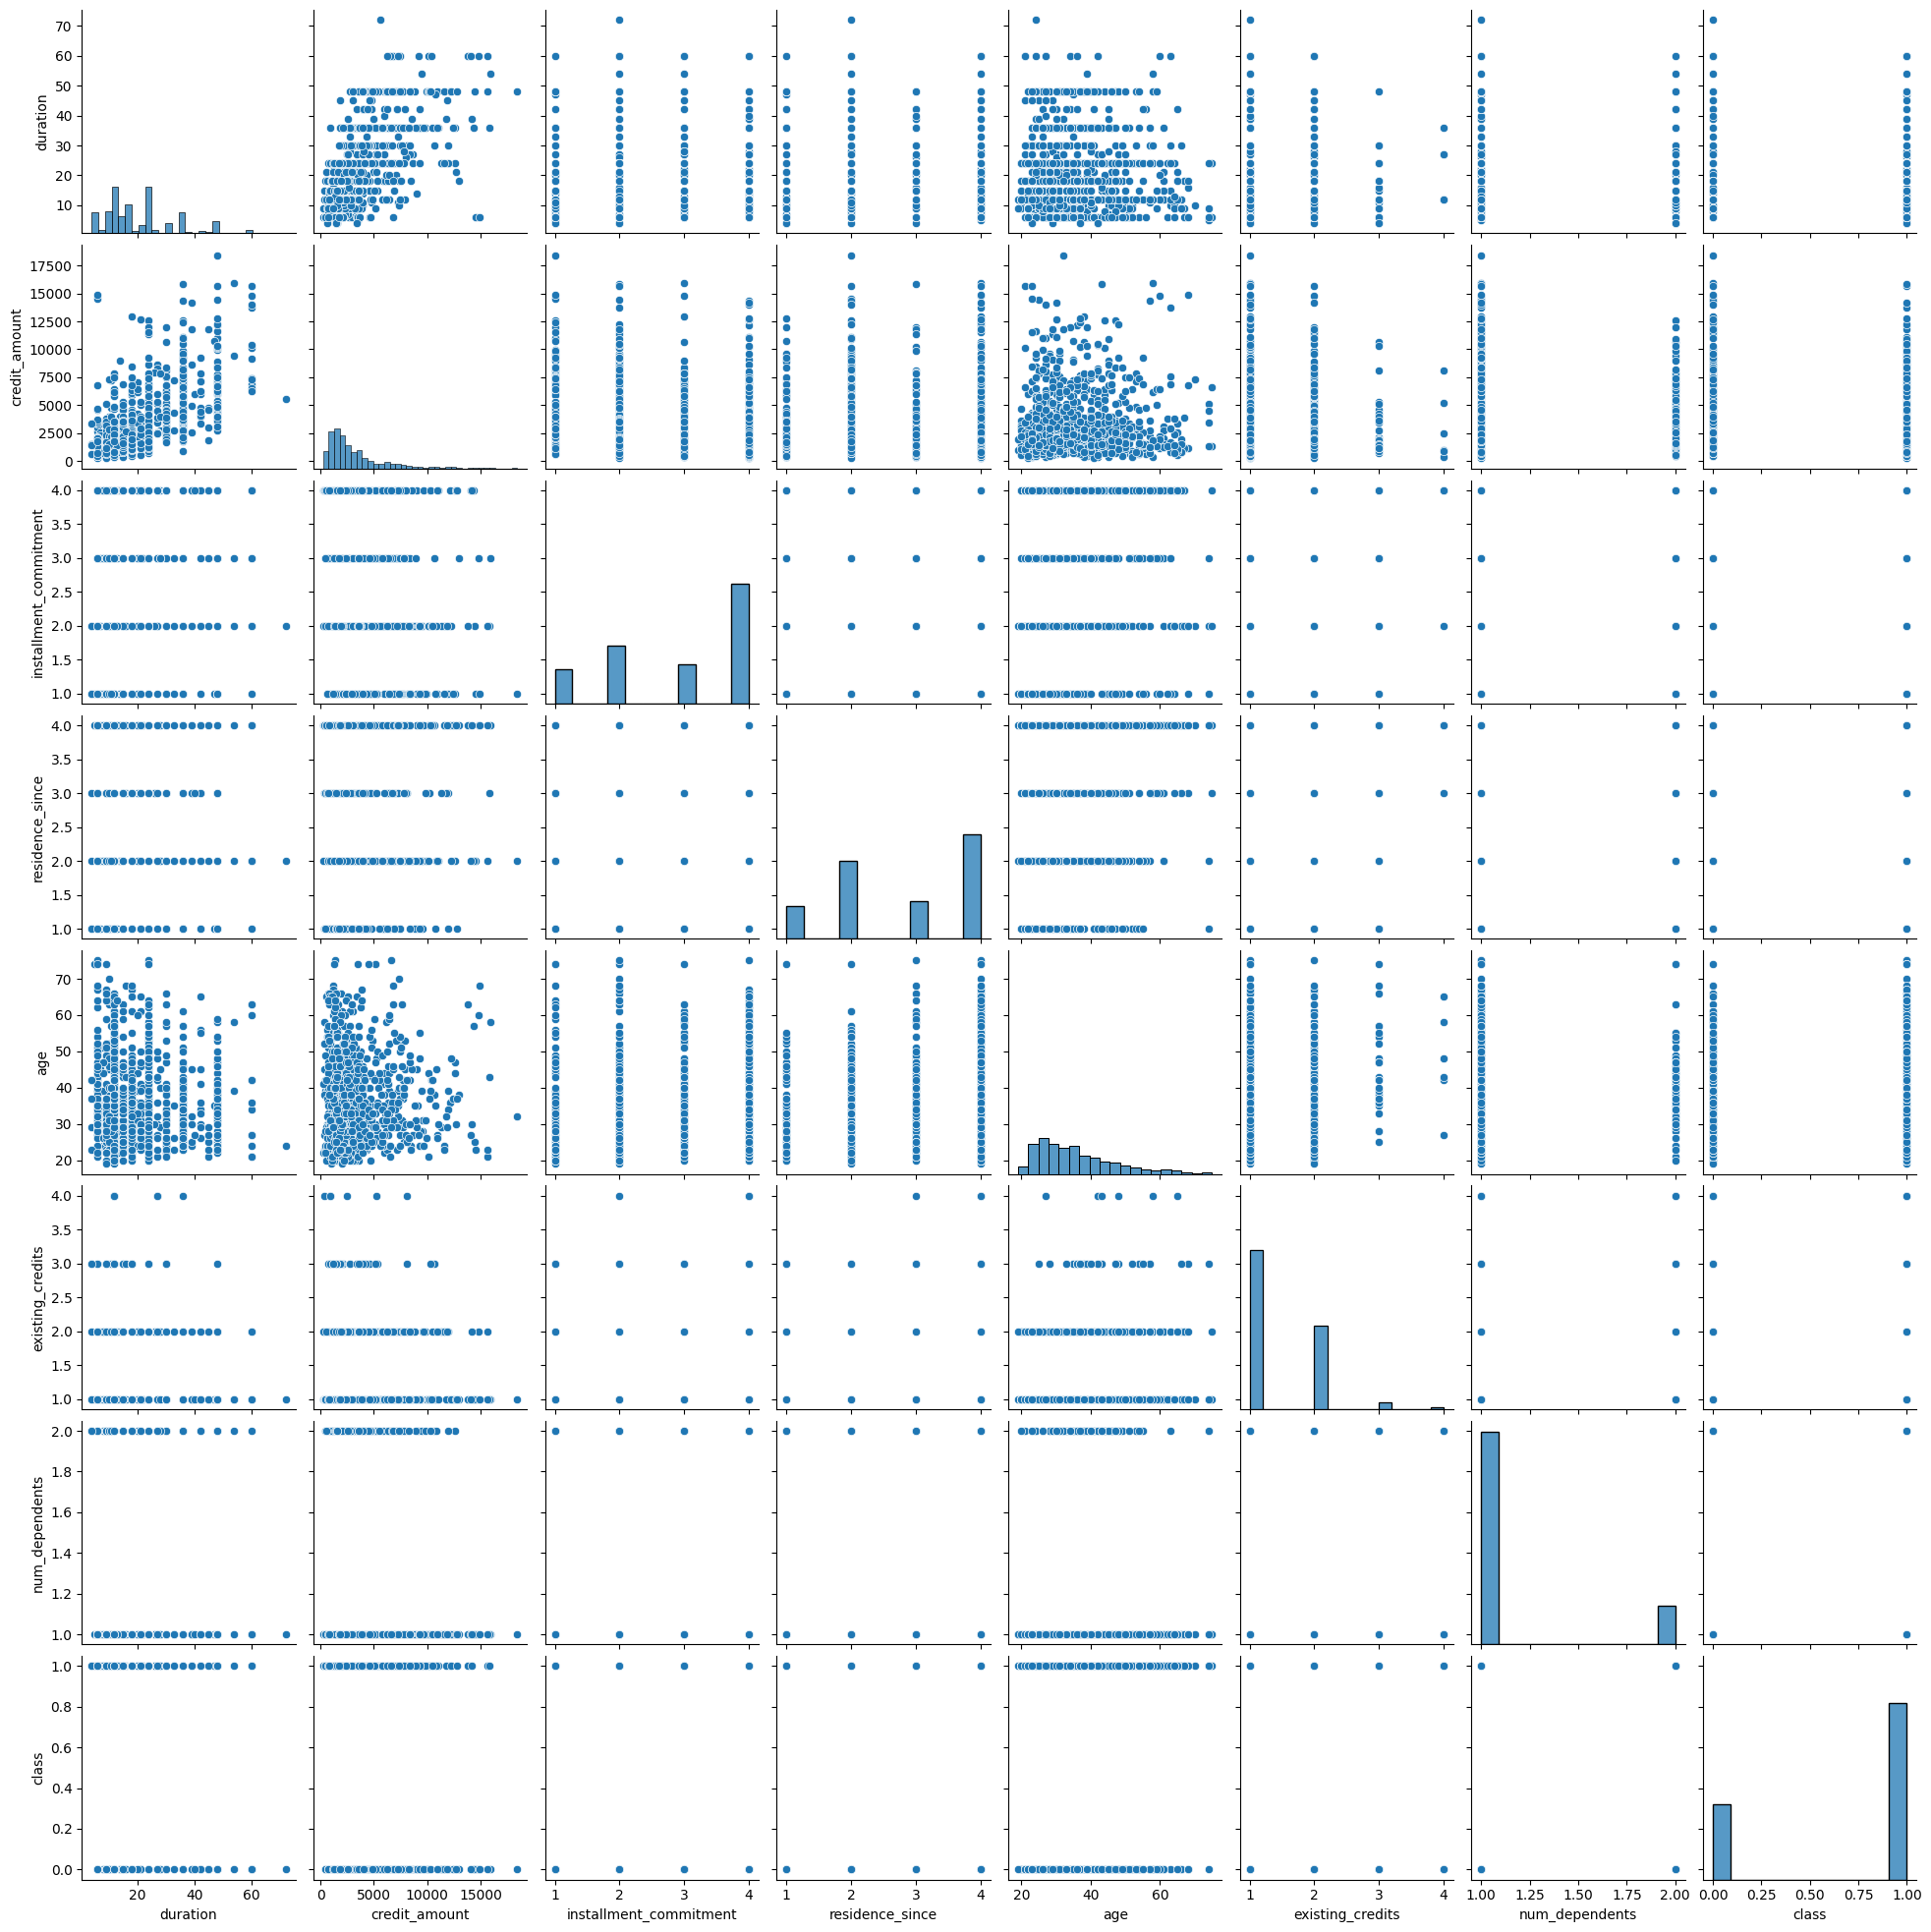

In [8]:
numeric_cols = DF.select_dtypes(['float64', 'int64'])

sns.pairplot(numeric_cols)